In [1]:
#Install necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import scipy.stats as stats
import scikit_posthocs as sp
import statannot
from adjustText import adjust_text
import statsmodels.api as sm
from statsmodels.formula.api import glm
import requests

In [2]:
def plot_single_box_swarm(df,x,y, title, color, ylabel):
    """Plot a single box plot with swarm plot for the specified column in the DataFrame"""
    
    # Set the figure size
    plt.figure(figsize=(10, 8))

    # Create the box plot with swarm plot
    sns.boxplot(x=df[y],y=df[x], width=0.4, color=color, showfliers=False)  # Adjust box width and color
    sns.swarmplot(x=df[y],y=df[x], color='k', size=3, alpha=0.6)  # Add swarm plot with custom size and color
    
    # Calculate and annotate median
    median = df[x].median()
    
    #define the number of digits after comman in medians
    max_value = df[x].max()
    if max_value > 100:
        median_formatted = f'{median:.0f}'
    elif max_value > 1:
        median_formatted = f'{median:.2f}'
    else:
        median_formatted = f'{median:.1e}'
    
    
    plt.text(-0.2, median, median_formatted, color='black', ha='center', va='center', 
             fontsize=12, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

    # Set titles and labels
    plt.title(title, fontsize=16)
    plt.xlabel('Data', fontsize=14)
    plt.ylabel(ylabel, fontsize=14)

    plt.title(title)
    plt.xlabel('Data')
    plt.ylabel(ylabel)

    plt.yticks(fontsize=12)
    plt.xticks([])  # Remove x-ticks as there's only one category

    # Add gridlines for better readability
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    
    # Show the plot
    plt.show()

In [3]:
def plot_single_histogram(df, column, title, color, xlabel, ylabel):
    """Plot a single histogram for the specified column in the DataFrame. """
    # Set the figure size
    plt.figure(figsize=(12, 8))

    # Create the histogram with KDE
    sns.histplot(df[column], bins=100, kde=True, color=color)

    # Set titles and labels
    plt.title(title, fontsize=16)
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)

    # Customize ticks
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    # Add gridlines for better readability
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)

    # Show the plot
    plt.show()


In [4]:
def plot_box_swarm_and_histogram(df, column, title_box, title_hist, color_box, color_hist, 
                                 ylabel_box, xlabel_hist, ylabel_hist):
    """Plot a box plot with swarm plot and a histogram side by side for the specified column in the DataFrame"""
    
    # Create a figure with two subplots: one for the box plot + swarm plot, one for the histogram
    fig, (ax_box, ax_hist) = plt.subplots(1, 2, figsize=(18, 8))

    # Plot the box plot with swarm plot on the first subplot
    sns.boxplot(data=df[column], width=0.4, color=color_box, ax=ax_box, showfliers=False)
    sns.swarmplot(data=df[column], color='k', size=3, alpha=0.6, ax=ax_box)
    
    # Calculate and annotate median on the box plot
    median = df[column].median()
    max_value = df[column].max()
    if max_value > 100:
        median_formatted = f'{median:.0f}'
    elif max_value > 1:
        median_formatted = f'{median:.3f}'
    else:
        median_formatted = f'{median:.1e}'
    
    ax_box.text(-0.2, median, median_formatted, color='black', ha='center', va='center', 
                fontsize=12, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

    ax_box.set_title(title_box, fontsize=16)
    ax_box.set_xlabel('Data', fontsize=14)
    ax_box.set_ylabel(ylabel_box, fontsize=14)
    ax_box.yaxis.set_tick_params(labelsize=12)
    ax_box.grid(True, which='both', linestyle='--', linewidth=0.5)
    ax_box.set_xticks([])  # Remove x-ticks as there's only one category
    
    # Plot the histogram on the second subplot
    sns.histplot(df[column], bins=50, kde=True, color=color_hist, ax=ax_hist)
    
    ax_hist.set_title(title_hist, fontsize=16)
    ax_hist.set_xlabel(xlabel_hist, fontsize=14)
    ax_hist.set_ylabel(ylabel_hist, fontsize=14)
    ax_hist.xaxis.set_tick_params(labelsize=12)
    ax_hist.yaxis.set_tick_params(labelsize=12)
    ax_hist.grid(True, which='both', linestyle='--', linewidth=0.5)

    # Adjust layout to prevent overlapping
    plt.tight_layout()

    # Show the plot
    plt.show()

In [5]:
def spearman_correlation_scatter(df, data1:str, data2:str, size:str="medium", title:str="", xlab:str="", ylab:str=""):
    '''This function calulcates the spearman correlation coefficient between two series of data and creates a scatter plot. It needs as input a dataframe,
    the name of the two columns and the desired size of the plot in the form of a string "big"/"medium"/"small". Addittionally, specify plot title and label'''
    
    # Extract the data to check for significance
    series1 = pd.Series(df[data1].tolist())
    series2 = pd.Series(df[data2].tolist())
    
    # Calculate Spearman correlation
    spearman_corr, p_value = stats.spearmanr(series1, series2)
    
    # Check if p-values is significant
    if p_value >= 0.05:
        print(f"The p-value is not significant (p = {p_value:.2f}), so the plot will not be created.")
        return
    else:
        # Choose dimensions
        size_dict = {"big": (16, 14, 12, 10, 8), "medium": (14, 12, 10, 8, 6), "small": (12, 10, 8, 6, 4)}
        dimensions = size_dict.get(size, size_dict["medium"]) 
        
        # Set size
        plt.figure(figsize=(dimensions[2], dimensions[4]))
        
        # Plot scatter plot
        scatter = plt.scatter(series2, series1, c=series1, cmap="viridis", alpha=0.9, zorder=2)
        
        # Title and labels
        plt.title(title if title else f"Scatter plot of correlation between {data1} and {data2}", fontsize=dimensions[0])
        plt.xlabel(xlab if xlab else f"{data2}", fontsize=dimensions[1])
        plt.ylabel(ylab if ylab else f"{data1}", fontsize=dimensions[1])
        
        # Add a regression line
        slope, intercept, r_value, p_value_linreg, std_err = stats.linregress(series2, series1)
        line = slope * np.array(series2) + intercept
        plt.plot(series2, line, color='red', label='Regression Line', alpha=0.6)
        
        # Add correlation text
        plt.text(0.95, 0.05, f'Spearman coeff. : {spearman_corr:.3f}\np-value: {p_value:.2e}', 
                 ha='right', va='bottom', transform=plt.gca().transAxes, color="red", fontsize=dimensions[2],
                 bbox=dict(facecolor='white', alpha=1))
        
        # Set gridlines to horizontal only
        plt.grid(True, axis='both', linestyle='--', linewidth=0.5, zorder=1)
        # Show plot
        plt.show()


In [6]:
def multiple_spearman_correlation_scatter(df1, data1:str, data2:str, df2, data3:str, data4:str, size:str="medium", title1:str="", xlab1:str="", ylab1:str="", title2:str="", xlab2:str="", ylab2:str=""):
    '''This function calulcates the spearman correlation coefficient between four series of data and creates 2 scatter plots. It needs as input 2 dataframes,
    the name of the four columns and the desired size of the plot in the form of a string "big"/"medium"/"small". Addittionally, specify plots titles and labels'''
    
    # Extract the data to check for signifcance
    series1=pd.Series(df1[data1].tolist())
    series2=pd.Series(df1[data2].tolist())
    series3=pd.Series(df2[data3].tolist())
    series4=pd.Series(df2[data4].tolist())
        
    # Calculate Spearman correlation
    spearman_corr_1_2, p_value_1_2 =stats.spearmanr(series1, series2)
    spearman_corr_3_4, p_value_3_4 =stats.spearmanr(series3, series4)

        # Check if p-values are significant
    if p_value_1_2 >= 0.05 and p_value_3_4 >= 0.05:
        print(f"The p-values are not significant (p1 = {p_value_1_2:.3f}, p2 = {p_value_3_4:.3f}), so the plot will not be created.")
        return
    
    if p_value_1_2 >= 0.05:
        print(f"Spearman correlation is not significant between {data1} and {data2} (p = {p_value_1_2:.3f}), so only the second plot will be created.")
        spearman_correlation_scatter(df2, data3, data4, size, title2)
        return
    
    if p_value_3_4 >= 0.05:
        print(f"Spearman correlation is not significant between {data3} and {data4} (p = {p_value_3_4:.3f}), so only the first plot will be created.")
        spearman_correlation_scatter(df1, data1, data2, size, title1)
        return

    # Choose dimensions
    size_dict = {"big": (16, 14, 12, 10, 8), "medium": (14, 12, 10, 8, 6), "small": (12, 10, 8, 6, 4)}
    dimensions = size_dict.get(size, size_dict["medium"])
            
    # Set up the figure and axes
    fig, axes = plt.subplots(1, 2, figsize=(dimensions[0], dimensions[4]))  # 1 row, 2 columns, adjusted figsize

    # Plot the first scatter plot
    scatter1 = axes[0].scatter(series2, series1, c=series1, cmap="viridis", alpha=0.8)
    cbar1 = fig.colorbar(scatter1, ax=axes[0])

    # Title and labels for the first plot
    axes[0].set_title(title1 if title1 else f"Scatter plot of correlation between {data1} and {data2}", fontsize=dimensions[0])
    axes[0].set_xlabel(xlab1 if xlab1 else f"{data2}", fontsize=dimensions[1])
    axes[0].set_ylabel(ylab1 if ylab1 else f"{data1}", fontsize=dimensions[1])
    
    # Add correlation text for the first plot
    axes[0].text(0.95, 0.05, f'p-value: {p_value_1_2:.2e}', 
                 ha='right', va='bottom', transform=axes[0].transAxes, color="red", fontsize=dimensions[3],
                 bbox=dict(facecolor='white', alpha=0.5))
    
    # Plot the second scatter plot
    scatter2 = axes[1].scatter(series4, series3, c=series3, cmap="viridis", alpha=0.8)
    cbar2 = fig.colorbar(scatter2, ax=axes[1])

    # Title and labels for the second plot
    axes[1].set_title(title2 if title2 else f"Scatter plot of correlation between {data3} and {data4}", fontsize=dimensions[0])
    axes[1].set_xlabel(xlab2 if xlab2 else f"{data4}", fontsize=dimensions[1])
    axes[1].set_ylabel(ylab2 if ylab2 else f"{data3}", fontsize=dimensions[1])
    
    # Add correlation text for the second plot
    axes[1].text(0.95, 0.05, f'p-value: {p_value_3_4:.2e}', 
                 ha='right', va='bottom', transform=axes[1].transAxes, color="red", fontsize=dimensions[3],
                 bbox=dict(facecolor='white', alpha=0.5))
    
    # Finalize
    for ax in axes:
        ax.grid(True)

    plt.tight_layout()
    plt.show()


In [7]:
def mannwhitney(data1,data2):
    '''This function calculates the Mann-Whitney U test between two series of data'''
    mannwhitneyu = stats.mannwhitneyu(data1, data2)
    return mannwhitneyu

In [8]:
def plot_violin_swarm_with_annotations(data, x, y, title='', x_label='', y_label='', custom_order=None, palette=None,pairs=""):
    """Plot a violin plot with swarm plot and add median lines and p-value annotations."""

    # Set up the figure and axis
    fig, ax = plt.subplots(figsize=(12, 7))

    # Plot violin and swarm plot
    sns.violinplot(ax=ax, x=x, y=y, data=data, palette=palette, inner='quartiles', linewidth=1, order=custom_order, zorder=2)
    sns.swarmplot(ax=ax, x=x, y=y, data=data, color='k', alpha=0.6, size=3, order=custom_order, zorder=3)

    # Add horizontal lines for median and median text    
    medians = data.groupby(x)[y].median().reindex(custom_order)
    
    for i, median in enumerate(medians):
        max_value = data[y].max()
        if max_value > 100:
            median_formatted = f'{median:.0f}'
        elif max_value > 1:
            median_formatted = f'{median:.3f}'
        else:
            median_formatted = f'{median:.1e}'
        
        ax.text(i-0.2, median, median_formatted, ha='center', va='center', color='black', fontsize=14, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.2'))
    
    # Add p-value annotations using statannot
    statannot.add_stat_annotation(ax=ax, data=data, x=x, y=y, hue=None, box_pairs=pairs,
                        test="Mann-Whitney", comparisons_correction=None,text_format="star", loc="inside", line_offset_to_box=0.15, verbose=2)

    # Add title and labels
    #ax.set_title(title, fontsize=16)
    ax.set_xlabel(x_label, fontsize=14)
    ax.set_ylabel(y_label, fontsize=14)
    plt.xticks(fontsize=16) # Increase font size for x-ticks
    ax.grid(True, axis='y', linestyle='--', linewidth=0.5, zorder=0)
    ax.set_axisbelow(True)
    
    # Show plot
    plt.tight_layout()
    plt.show()

In [9]:
def perform_kruskal_dunn(df_list,data,names, significance_level=0.05):
    """
    Perform the Kruskal-Wallis test, and if significant, perform the Dunn test.
    
    Parameters:
        groups (list of pd.Series): List of data series for each group.
        significance_level (float): Significance level for the Kruskal-Wallis test.
    
    Returns:
        None
    """
    groups=[]
    for e in df_list:
        groups.append(e[data])
        
    # Perform the Kruskal-Wallis test
    kruskal_result = stats.kruskal(*groups)
    
    # Print the Kruskal-Wallis test result
    print(f'Kruskal-Wallis test result: H-statistic = {kruskal_result.statistic}, p-value = {kruskal_result.pvalue}')
    
    # Check if the result is significant
    if kruskal_result.pvalue < significance_level:
        print("Kruskal-Wallis test is significant, performing Dunn test...")
        
        # Perform the Dunn test with Bonferroni correction
        dunn_result = sp.posthoc_dunn(groups, p_adjust='bonferroni')
        
        # Print significant results from the Dunn test
        print("Significant Dunn test results (Bonferroni corrected):")
        significant_results = dunn_result[dunn_result < significance_level]
        print(significant_results)
        for i in range(len(significant_results)):
            for j in range(len(significant_results)):
                if i < j:
                    if significant_results.iloc[i, j] < significance_level:
                        print(names[i],names[j],significant_results.iloc[i, j])
        return significant_results
    
    else:
        print("Kruskal-Wallis test is not significant, skipping Dunn test.")


In [10]:
def plot_violin_swarm_with_annotations_animals(data, x, y, significant_results=None, title='', x_label='', y_label='', custom_order=None, palette=None,names=""):
    """Plot a violin plot with swarm plot and add median lines and p-value annotations."""

    #custom_order = ["human", "dog",  "cow","goat", "sheep"]
     
    # Set up the figure and axis
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot violin and swarm plot
    sns.violinplot(ax=ax, x=x, y=y, data=data, palette=palette, inner='quartiles', linewidth=1, order=custom_order, zorder=2)
    sns.swarmplot(ax=ax, x=x, y=y, data=data, color='k', alpha=0.6, size=3, order=custom_order, zorder=3)

    # Add horizontal lines for median and median text    
    medians = data.groupby(x)[y].median().reindex(custom_order)
    
    for i, median in enumerate(medians):
        max_value = data[y].max()
        if max_value > 100:
            median_formatted = f'{median:.0f}'
        elif max_value > 1:
            median_formatted = f'{median:.3f}'
        else:
            median_formatted = f'{median:.1e}'
        
        ax.text(i-0.25, median, median_formatted, ha='center', va='center', color='black', fontsize=14, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.2'))
    
    significant_pairs = []
    significant_pvalues =[]
    
    if significant_results is not None:
        for i in range(len(significant_results)):
                for j in range(len(significant_results)):
                    if i < j:
                        if significant_results.iloc[i, j] < 0.05:
                            significant_pairs.append((names[j],names[i]))
                            significant_pvalues.append(significant_results.iloc[i, j])
        print(significant_pairs)  
        print(significant_pvalues)              
        # Add p-value annotations using statannot
        statannot.add_stat_annotation(ax=ax, data=data, x=x, y=y, box_pairs=significant_pairs, order=custom_order, line_height=0,text_offset=0.01,line_offset=0.01,
                        perform_stat_test=False, pvalues=significant_pvalues, line_offset_to_box=0.1,text_format="star", loc="inside", verbose=2)

    # Add title and labels
    #ax.set_title(title, fontsize=16)
    ax.set_xlabel(x_label, fontsize=14)
    ax.set_ylabel(y_label, fontsize=14)
    plt.xticks(fontsize=16)
    
    ax.grid(True, axis='y', linestyle='--', linewidth=0.5, zorder=0)
    ax.set_axisbelow(True)
    
    # Show plot
    plt.tight_layout()
    plt.show()        

In [11]:
def plot_box_swarm(data, x_col, y_col, title='', x_label='', y_label='',color="skyblue"):
    """
    Plot a combined box plot and swarm plot for HGT_richness.
    
    Parameters:
        data (pd.DataFrame): DataFrame containing the data to plot.
        x_col (str): Column name for the x-axis.
        y_col (str): Column name for the y-axis.
        hue_col (str): Column name for the hue.
        title (str): Title of the plot.
        x_label (str): Label for the x-axis.
        y_label (str): Label for the y-axis.
        palette (dict): Color palette for the hue.
    """
    hue_col=data["species"].apply(lambda x: 'human' if x == 'human' else 'animals')
    palette={'human': '#F77F00', 'animals': '#143642'}

    # Set up the figure and axes
    plt.figure(figsize=(14, 9))
    
    # Plot box plot
    sns.boxplot(x=x_col, y=y_col, data=data, color=color, width=0.7, showfliers=False)
    
    # Plot swarm plot
    sns.swarmplot(x=x_col, y=y_col, data=data, hue=hue_col, palette=palette, size=3)
    
    # Set title and labels
    plt.title(title, fontsize=16)
    plt.xlabel(x_label, fontsize=14)
    plt.ylabel(y_label, fontsize=14)
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=90, fontsize=8, ha='right')
    
    # Improve y-axis ticks formatting
    plt.ticklabel_format(style='plain', axis='y')
    
    # Show plot
    plt.tight_layout()
    plt.show()

In [12]:
def plot_donut_and_histogram_with_custom_order(df, level_col='level', count_col='count', custom_order=None, title_donut='Donut Chart', title_hist='Histogram', donut_explode=0, bar_margin=0.1, colors="blue"):
    if custom_order is not None:
        df_sorted = df.set_index(level_col).loc[custom_order].reset_index()
    else:
        df_sorted = df

    fig, axes = plt.subplots(1, 2, figsize=(18, 8))

    # Plot Donut Chart
    donut_explode = [donut_explode] * len(df_sorted)

    wedges, texts, autotexts = axes[0].pie(
        df_sorted[count_col],
        startangle=140,
        labels=df_sorted[level_col],
        wedgeprops=dict(width=0.3),
        autopct='%1.1f%%',
        pctdistance=0.85,
        labeldistance=1.05,
        explode=donut_explode,
        colors=colors
    )

    # Draw a white circle at the center to make it a donut chart
    centre_circle = plt.Circle((0, 0), 0.65, color='white', fc='white', linewidth=0)
    axes[0].add_artist(centre_circle)

    # Equal aspect ratio ensures that pie is drawn as a circle
    axes[0].axis('equal')
    axes[0].set_title(title_donut)

    # Plot Histogram
    axes[1].bar(df[level_col], df[count_col], color=colors, width=0.8, edgecolor='black', linewidth=0.5)
    axes[1].set_title(title_hist)
    axes[1].set_xlabel(level_col)
    axes[1].set_ylabel(count_col)

    # Display counts on top of bars in histogram
    for i, v in enumerate(df[count_col]):
        axes[1].text(i, v + 0.5, str(v), ha='center', va='bottom')

    # Rotate x-axis labels for better readability
    axes[1].set_xticklabels(df[level_col], rotation=45, ha='right')

    # Display the plots
    plt.tight_layout()
    plt.show()


In [13]:
def make_df_top3_LCA(df, letter="s",n=3):
    clade=[]
    count=[]
    for i,row in df.iterrows():
        if f"{letter}__" in row[0]:
            clade.append(row[0])
            count.append(row[1])
    
    df_LCA_tax=pd.DataFrame(columns=["LCA","count"])
    df_LCA_tax["LCA"]=clade
    df_LCA_tax["count"]=count
    if letter!="k":
        df_LCA_tax_5=df_LCA_tax.head(n)
        
        df_LCA_last=pd.DataFrame(columns=["LCA","count"])
        sum=df_LCA_tax["count"][n:].sum()
        df_LCA_last["LCA"]=["others"]
        df_LCA_last["count"]=[sum]
    
        df_LCA_6=pd.concat([df_LCA_tax_5,df_LCA_last], ignore_index=True)
        return df_LCA_6
    else:
        return df_LCA_tax
    

In [14]:
def make_multiple_pies(df_list,x,labels,colors,names):
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))  # 3 plots per row, 2 rows
    fig.suptitle("Top 3 LCA per taxonomic level", fontsize=16)

    for i, ax in enumerate(axes.flatten()):
        df_LCA = df_list[i]
        wedges, texts, autotexts = ax.pie(df_LCA[x], labels=df_LCA[labels], startangle=140, 
                                        pctdistance=0.85, autopct='%1.0f%%', 
                                        wedgeprops=dict(width=0.3), colors=colors)
        center_circle = plt.Circle((0, 0), 0.65, color='white', fc='white', linewidth=0)
        ax.add_artist(center_circle)
        ax.set_title(f"Pie Chart {names[i]}")

    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust the layout to fit the suptitle
    plt.show()

In [15]:
def confounder_analysis(df, dependent_var, primary_independent_var, potential_confounder):
    # Ensure the primary independent variable is categorical if not already
    if df[primary_independent_var].dtype.name != 'category':
        df[primary_independent_var] = df[primary_independent_var].astype('category')
    
    # Null model: dependent_var ~ primary_independent_var
    null_model = glm(f'{dependent_var} ~ {primary_independent_var}', data=df, family=sm.families.Gaussian())
    null_result = null_model.fit()
    
    # Full model: dependent_var ~ primary_independent_var + potential_confounder
    full_model = glm(f'{dependent_var} ~ {primary_independent_var} + {potential_confounder}', data=df, family=sm.families.Gaussian())
    full_result = full_model.fit()
    
    # Print summary of the null model
    print("Null Model Summary:")
    print(null_result.summary())
    
    # Print summary of the full model
    print("Full Model Summary:")
    print(full_result.summary())
    
    # Print p-values of the full model
    print("P-values for the Full Model:")
    print(full_result.pvalues)
    
    # Calculate the likelihood ratio test manually
    lr_stat = 2 * (full_result.llf - null_result.llf)
    df_diff = full_result.df_model - null_result.df_model
    p_value = stats.chi2.sf(lr_stat, df_diff)
    
    print(f"Likelihood Ratio Test Statistic: {lr_stat}")
    print(f"Degrees of Freedom Difference: {df_diff}")
    print(f"P-value: {p_value}")

In [16]:
states_color=["#92B86C","#1496B6"]
dataset_colors=["#DA344D","#D91E36","#1E91D6","#0072BB","#DAFF7D","#8FC93A"]
sex_nation_colors=["#FF8552","#FF8552", "#297373","#297373","#E9D758","#E9D758"]
species_colors=["#43666C","#8E3333","#D3D9D7","#C26D29","#CFBF46"]
humans_animals_colors=["#FFE74C","#FF5964"]
family_colors=["#32CBFF","#00A5E0","#89A1EF","#725AC1","#8D86C9","#B9FFB7","#ABEDC6","#98D9C2"]
age_colors=["#C9DBBA","#DCDBA8","#F5CDA7","#FAA381","#DB5A42"]
lca_colors=["#62466B","#093A3E","#2D5D7B","#133C55","#457EAC","#62BEC1","#386FA4","#9191E9","#C2AFF0"]

mchip=["#48CFAE", "#48CFAE", "#48CFAE", "#48CFAE", "#48CFAE"]
mchip_sex=["#70E000","#70E000","#008000","#008000",  "#004B23", "#004B23"]

# Load the dataset

In [17]:
df=pd.read_csv("metachip_metadata.tsv", sep="\t")
df.head(5)
df.shape

(539, 17)

In [18]:
df["HGT_richness"]=df["mchip_HGT"]/df["richness"]
max_depth=max(df["n_of_reads"])
df["HGT_depth"]=df["mchip_HGT"]*(max_depth/df["n_of_reads"])
df.head(5)

,sampleID,subjectID,householdID,family_role,species,date,sex,age_days,age_months,age_years,diarrhea_last24h,location,country,Dataset,mchip_HGT,richness,n_of_reads,HGT_richness,HGT_depth
0,C16-20292-GH,C16-20292-GH,C16-10332-GH,mother,human,19/7/17,female,9131.0,300.0,25.0,No,Agogo,Ghana,CM_ghana,16,261.0,31579677.0,0.061303,135.514618
1,C16-20029-GH,C16-20029-GH,C16-10056-GH,mother,human,1/7/16,female,10226.0,336.0,28.0,No,Agogo,Ghana,CM_ghana,92,447.0,71784691.0,0.205817,342.791338
2,C16-20245-GH,C16-20245-GH,C16-10312-GH,sibling,human,4/7/17,female,1826.0,60.0,5.0,No,Agogo,Ghana,CM_ghana,109,330.0,28717616.0,0.330303,1015.200822
3,C16-20111-GH,C16-20111-GH,C16-10146-GH,sibling,human,17/11/16,female,4382.0,144.0,12.0,No,Agogo,Ghana,CM_ghana,124,393.0,52670192.0,0.315522,629.695559
4,C16-20244-GH,C16-20244-GH,C16-10312-GH,sibling,human,4/7/17,male,2191.0,72.0,6.0,No,Agogo,Ghana,CM_ghana,44,223.0,48449322.0,0.197309,242.906323


In [19]:
print(df["mchip_HGT"].sum())

38858


### Make smaller dataframes

In [20]:
#country distributions analysis
df_ghana=df[df["country"]=="Ghana"]
df_tanzania=df[df["country"]=="Tanzania"]

#Species distribution analysis
df_humans=df[df["species"]=="human"]
df_humans["species"]="Humans"
df_goats=df[df["species"]=="goat"]
df_goats["species"]="Goats"
df_cows=df[df["species"]=="cow"]
df_cows["species"]="Cows"
df_sheeps=df[df["species"]=="sheep"]
df_sheeps["species"]="Sheep"
df_dogs=df[df["species"]=="dog"]
df_dogs["species"]="Dogs"
df_animals=pd.concat([df_goats,df_sheeps,df_cows,df_dogs],ignore_index=True)
df_animals["species"]="Animals"
df_all_species=pd.concat([df_humans,df_goats,df_sheeps,df_cows,df_dogs],ignore_index=True)
df_binomial_species=pd.concat([df_humans,df_animals], ignore_index=True)

#Sex distribution analysis
df_males=df[df["sex"]=="male"]
df_females=df[df["sex"]=="female"]
df_GH_males=df_males[df_males["country"]=="Ghana"]
df_GH_females=df_females[df_females["country"]=="Ghana"]
df_TZ_males=df_males[df_males["country"]=="Tanzania"]
df_TZ_females=df_females[df_females["country"]=="Tanzania"]

df_GH_males_copy = df_GH_males.copy()
df_GH_females_copy = df_GH_females.copy()
df_TZ_males_copy = df_TZ_males.copy()
df_TZ_females_copy = df_TZ_females.copy()
df_males_copy = df_males.copy()
df_females_copy = df_females.copy()

df_GH_males_copy.loc[:, 'dataset'] = 'males_GH'
df_GH_females_copy.loc[:, 'dataset'] = 'females_GH'
df_TZ_males_copy.loc[:, 'dataset'] = 'males_TZ'
df_TZ_females_copy.loc[:, 'dataset'] = 'females_TZ'
df_males_copy.loc[:, 'dataset'] = 'males'
df_females_copy.loc[:, 'dataset'] = 'females'
df_sex_plot = pd.concat([df_GH_males_copy, df_GH_females_copy, df_TZ_males_copy, df_TZ_females_copy, df_males_copy, df_females_copy], ignore_index=True) 

#Family role distribution analysis
df_family_role=df[df["family_role"]!="animal"]
df_mother=df_family_role[df_family_role["family_role"]=="mother"]
df_father=df_family_role[df_family_role["family_role"]=="father"]
df_sibling=df_family_role[df_family_role["family_role"]=="sibling"]
df_grandmother=df_family_role[df_family_role["family_role"]=="grandmother"]
df_grandfather=df_family_role[df_family_role["family_role"]=="grandfather"]
df_aunt=df_family_role[df_family_role["family_role"]=="aunt"]
df_uncle=df_family_role[df_family_role["family_role"]=="uncle"]
df_cousin=df_family_role[df_family_role["family_role"]=="cousin"]

#Age distribution analysis
df_newborn = df[(df['age_years'] >= 0) & (df['age_years'] < 1)]
df_child = df[(df['age_years'] >= 1) & (df['age_years'] < 12)]
df_schoolage = df[(df['age_years'] >= 12) & (df['age_years'] < 19)]
df_adult = df[(df['age_years'] >= 19) & (df['age_years'] < 65)]
df_senior = df[(df['age_years'] >= 65) & (df['age_years'] <= 100)]

df_newborn_copy = df_newborn.copy()
df_child_copy = df_child.copy()
df_schoolage_copy = df_schoolage.copy()
df_adult_copy = df_adult.copy()
df_senior_copy = df_senior.copy()

df_newborn_copy['dataset'] = 'newborn'
df_child_copy['dataset'] = 'child'
df_schoolage_copy['dataset'] = "schoolage"
df_adult_copy['dataset'] = 'adult'
df_senior_copy['dataset'] = 'senior'

df_age=pd.concat([df_newborn_copy, df_child_copy, df_schoolage_copy, df_adult_copy, df_senior_copy], ignore_index=True)

/tmp/ipykernel_1927/3922783107.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_humans["species"]="Humans"
/tmp/ipykernel_1927/3922783107.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_goats["species"]="Goats"
/tmp/ipykernel_1927/3922783107.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

In [21]:
print(df["mchip_HGT"].sum())
print(df_ghana["mchip_HGT"].sum())
print(df_tanzania["mchip_HGT"].sum())

38858
23313
15545


# HGT distribution among samples normalized by richness and by depth

### Boxplot

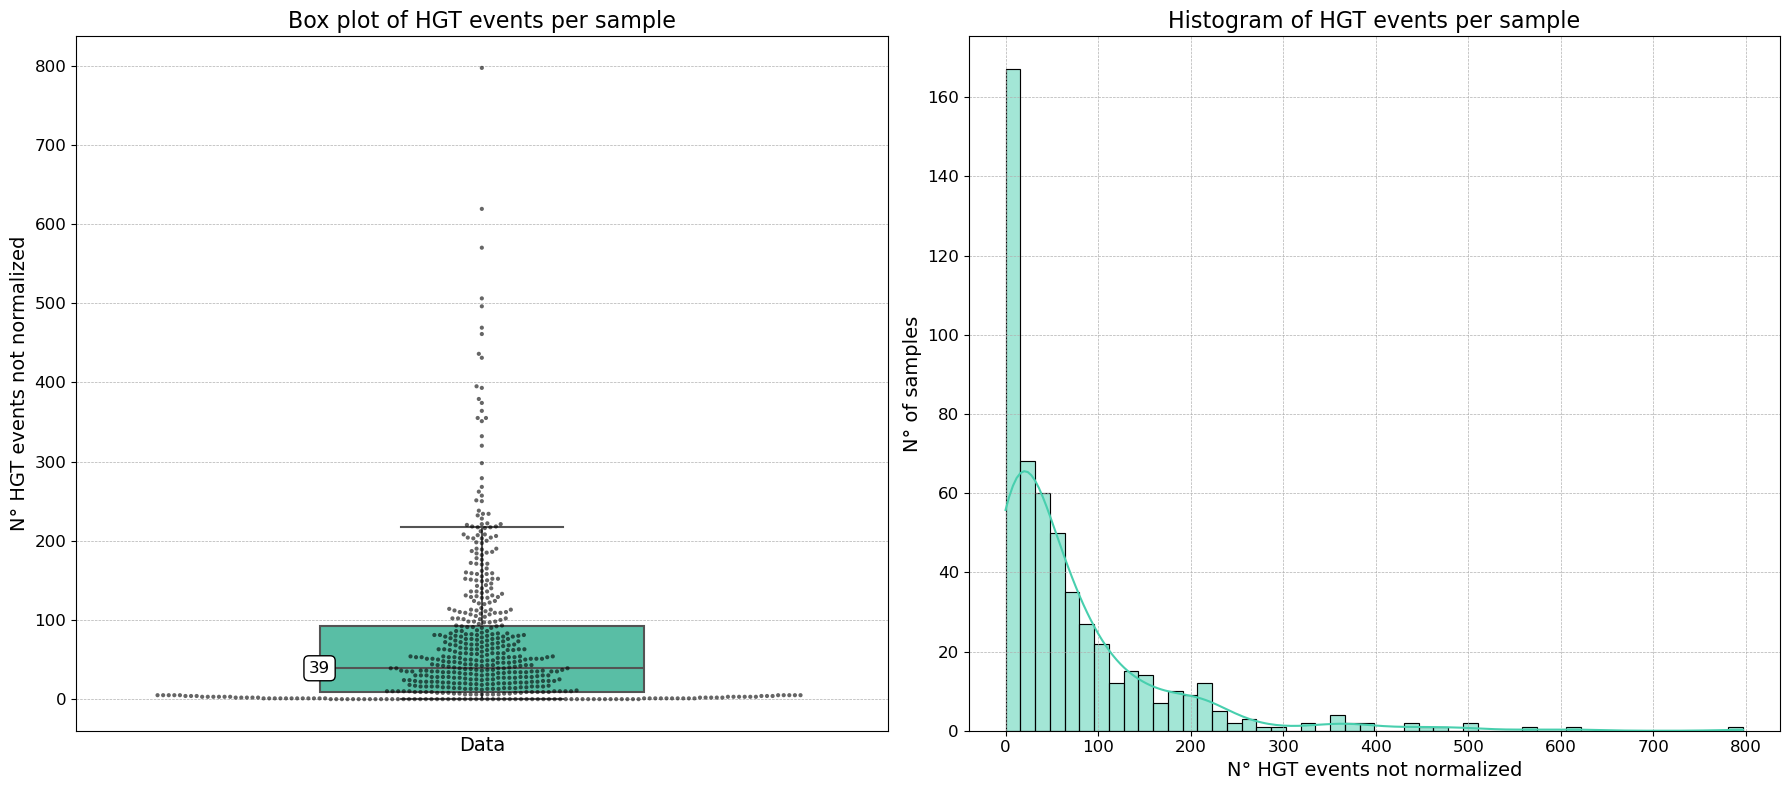

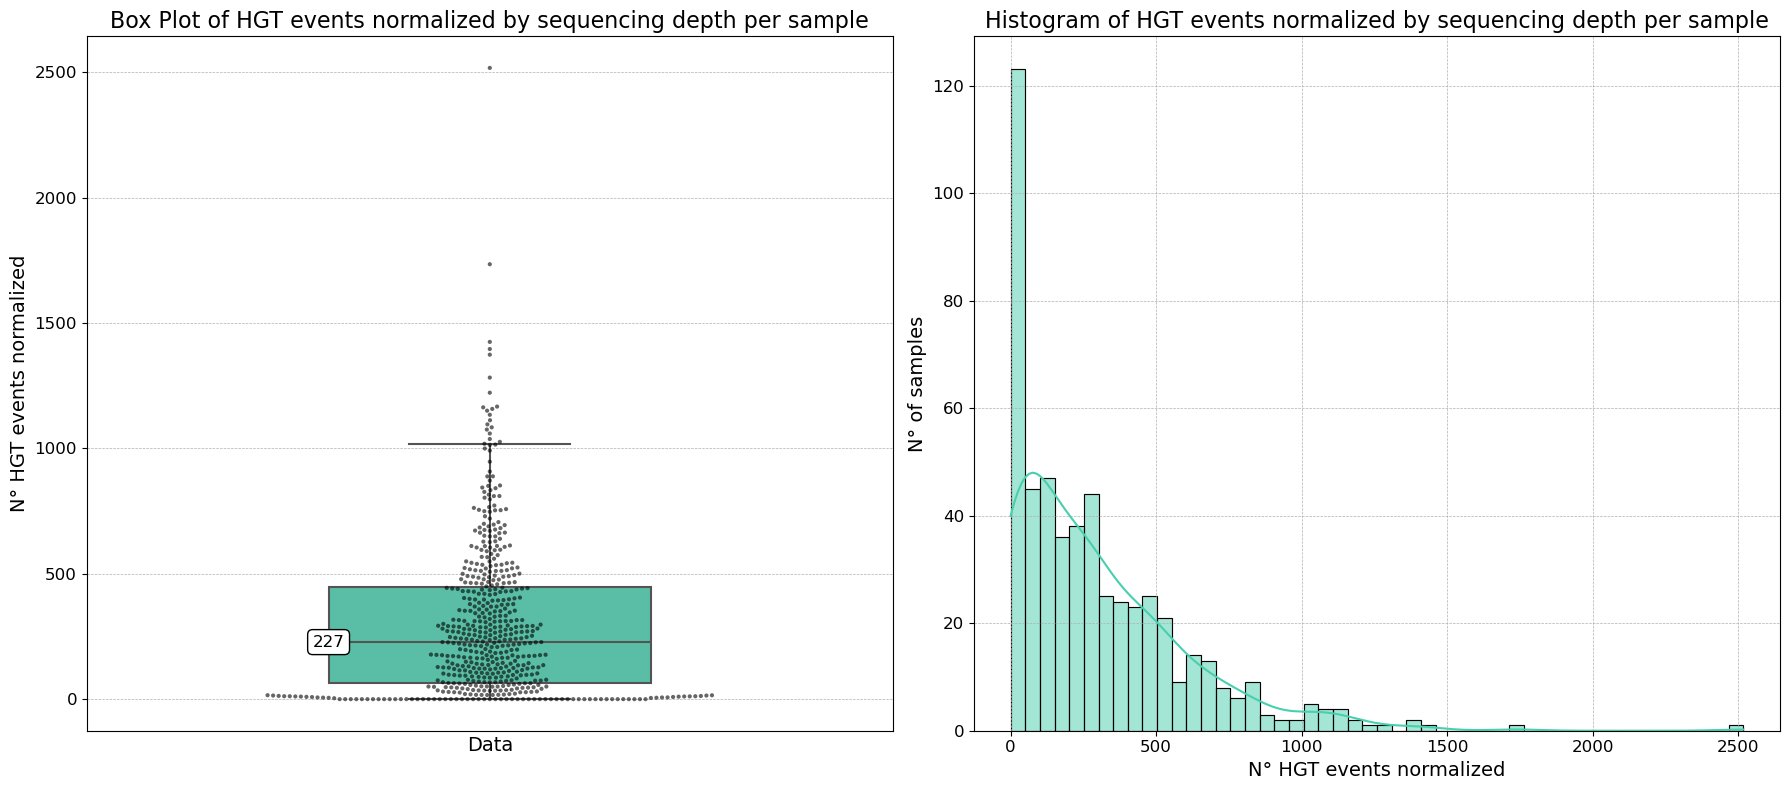

In [22]:
#plot distribution of HGT
plot_box_swarm_and_histogram(df, 'mchip_HGT', 'Box plot of HGT events per sample', 'Histogram of HGT events per sample',mchip[0], mchip[1], 'N° HGT events not normalized', 'N° HGT events not normalized','N° of samples')
plot_box_swarm_and_histogram(df, 'HGT_depth', 'Box Plot of HGT events normalized by sequencing depth per sample', 'Histogram of HGT events normalized by sequencing depth per sample',mchip[0], mchip[1], 'N° HGT events normalized', 'N° HGT events normalized','N° of samples')

# Correlation between richness and HGT events

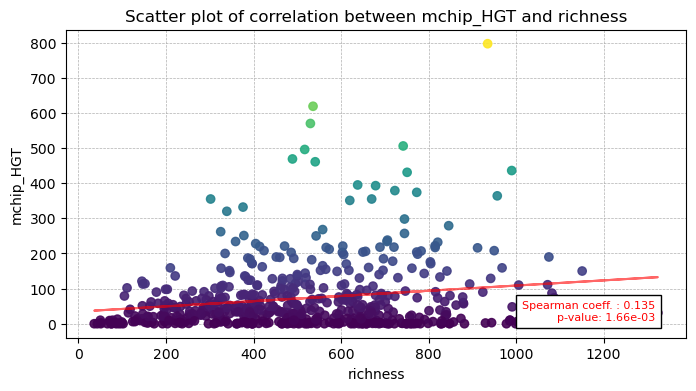

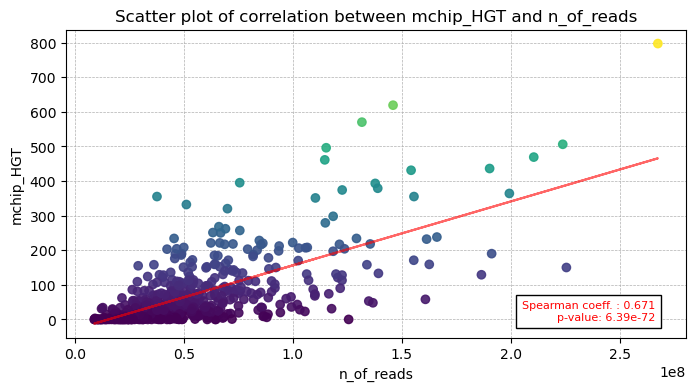

In [23]:
spearman_correlation_scatter(df, "mchip_HGT", "richness","small")
spearman_correlation_scatter(df, "mchip_HGT", "n_of_reads","small")

# COuntry distribution

/home/giacomo/anaconda3/envs/analysis/lib/python3.12/site-packages/seaborn/categorical.py:1296: UserWarning: 5.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Ghana v.s. Tanzania: Mann-Whitney-Wilcoxon test two-sided, P_val=9.599e-15 U_stat=4.866e+04


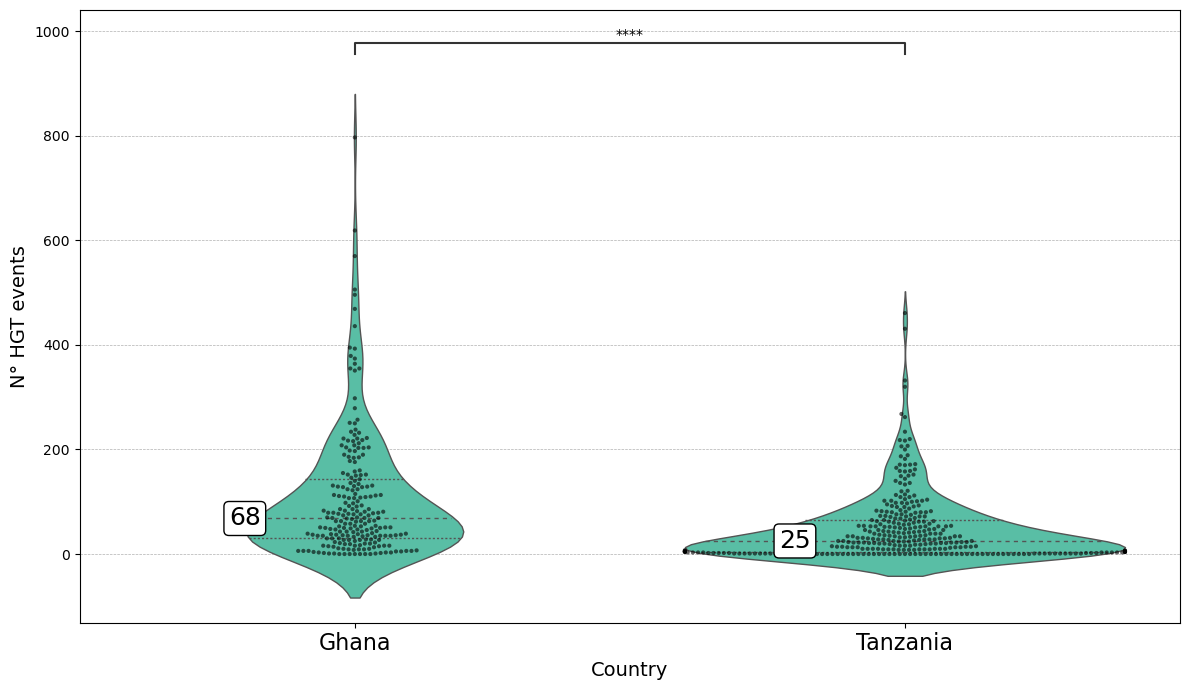

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Ghana v.s. Tanzania: Mann-Whitney-Wilcoxon test two-sided, P_val=6.782e-15 U_stat=4.874e+04


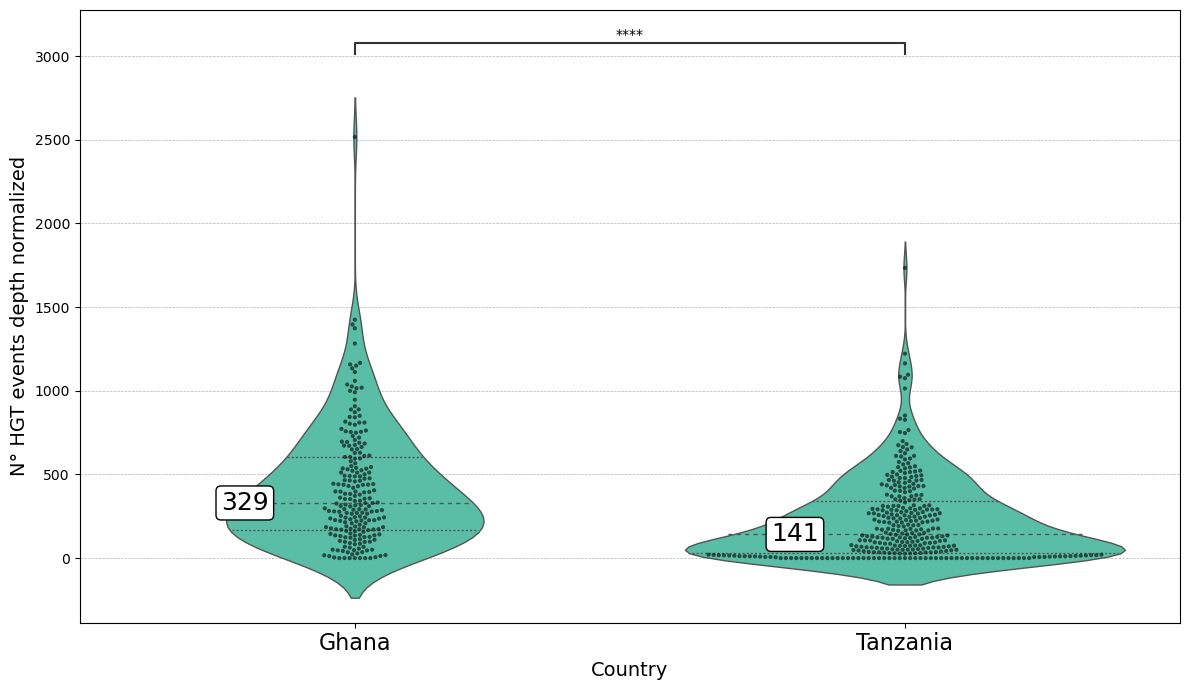

In [24]:
plot_violin_swarm_with_annotations(df, 'country', 'mchip_HGT', 'HGT events distribution per country', 'Country', 'N° HGT events', custom_order=["Ghana", "Tanzania"], palette=mchip, pairs=[('Ghana', 'Tanzania')])
plot_violin_swarm_with_annotations(df, 'country', 'HGT_depth', 'HGT events distribution per country', 'Country', 'N° HGT events depth normalized', custom_order=["Ghana", "Tanzania"], palette=mchip, pairs=[('Ghana', 'Tanzania')])


# Distribution of HGT events per sex divided by country

In [25]:
MW_GH_sex = mannwhitney(df_GH_males['mchip_HGT'], df_GH_females['mchip_HGT'])
MW_TZ_sex = mannwhitney(df_TZ_males['mchip_HGT'], df_TZ_females['mchip_HGT'])
MW_sex = mannwhitney(df_males['mchip_HGT'], df_females['mchip_HGT'])
print("Significance in richness between males and females")
print( "mannwhitney males vs females Ghana:", MW_GH_sex[1])
print( "mannwhitney males vs females Tanzania:",MW_TZ_sex[1])
print( "mannwhitney males vs females:", MW_sex[1])

MW_GH_sex_depth = mannwhitney(df_GH_males['HGT_depth'], df_GH_females['HGT_depth'])
MW_TZ_sex_depth = mannwhitney(df_TZ_males['HGT_depth'], df_TZ_females['HGT_depth'])
MW_sex_depth = mannwhitney(df_males['HGT_depth'], df_females['HGT_depth'])
print("Significance in sequencing depth between males and females")
print( "mannwhitney males vs females Ghana:", MW_GH_sex_depth[1])
print( "mannwhitney males vs females Tanzania:",MW_TZ_sex_depth[1])
print( "mannwhitney males vs females:", MW_sex_depth[1])

Significance in richness between males and females
mannwhitney males vs females Ghana: 0.45715519204869437
mannwhitney males vs females Tanzania: 0.6373873797806062
mannwhitney males vs females: 0.37194346007955315
Significance in sequencing depth between males and females
mannwhitney males vs females Ghana: 0.3351379112577356
mannwhitney males vs females Tanzania: 0.5726845088886949
mannwhitney males vs females: 0.2841459997506325


### Plot

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

males_GH v.s. females_GH: Mann-Whitney-Wilcoxon test two-sided, P_val=4.572e-01 U_stat=5.635e+02
males_TZ v.s. females_TZ: Mann-Whitney-Wilcoxon test two-sided, P_val=6.374e-01 U_stat=2.047e+03
males v.s. females: Mann-Whitney-Wilcoxon test two-sided, P_val=3.719e-01 U_stat=4.907e+03


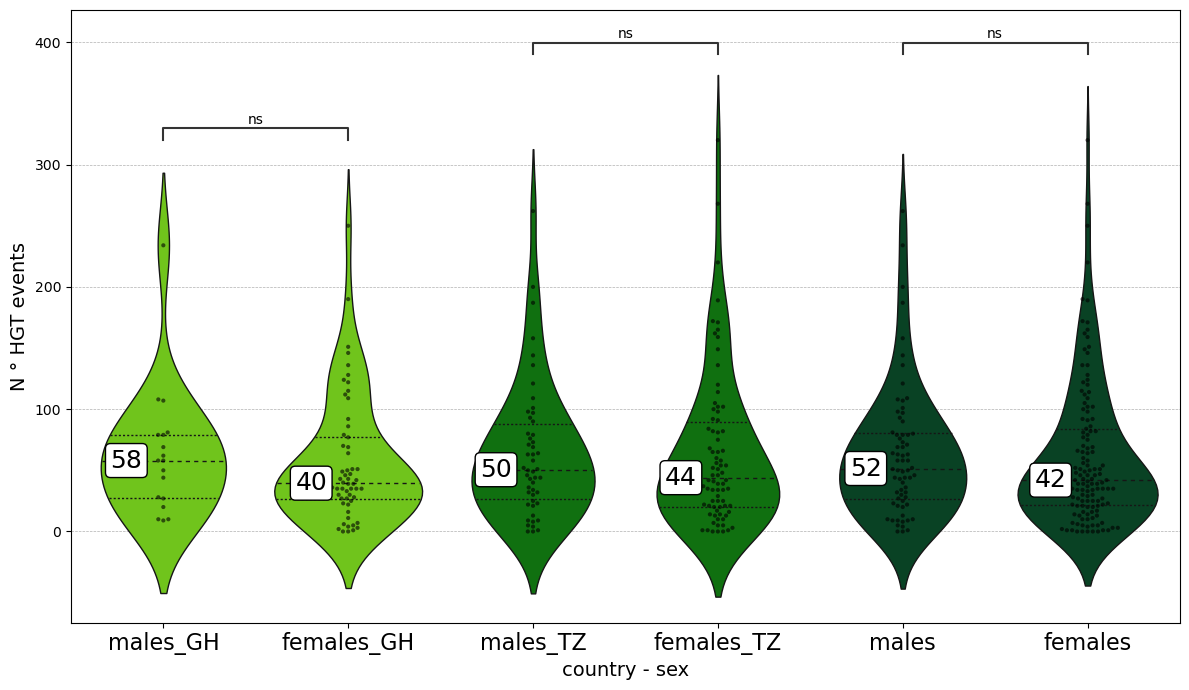

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

males_GH v.s. females_GH: Mann-Whitney-Wilcoxon test two-sided, P_val=3.351e-01 U_stat=5.810e+02
males_TZ v.s. females_TZ: Mann-Whitney-Wilcoxon test two-sided, P_val=5.727e-01 U_stat=2.066e+03
males v.s. females: Mann-Whitney-Wilcoxon test two-sided, P_val=2.841e-01 U_stat=4.977e+03


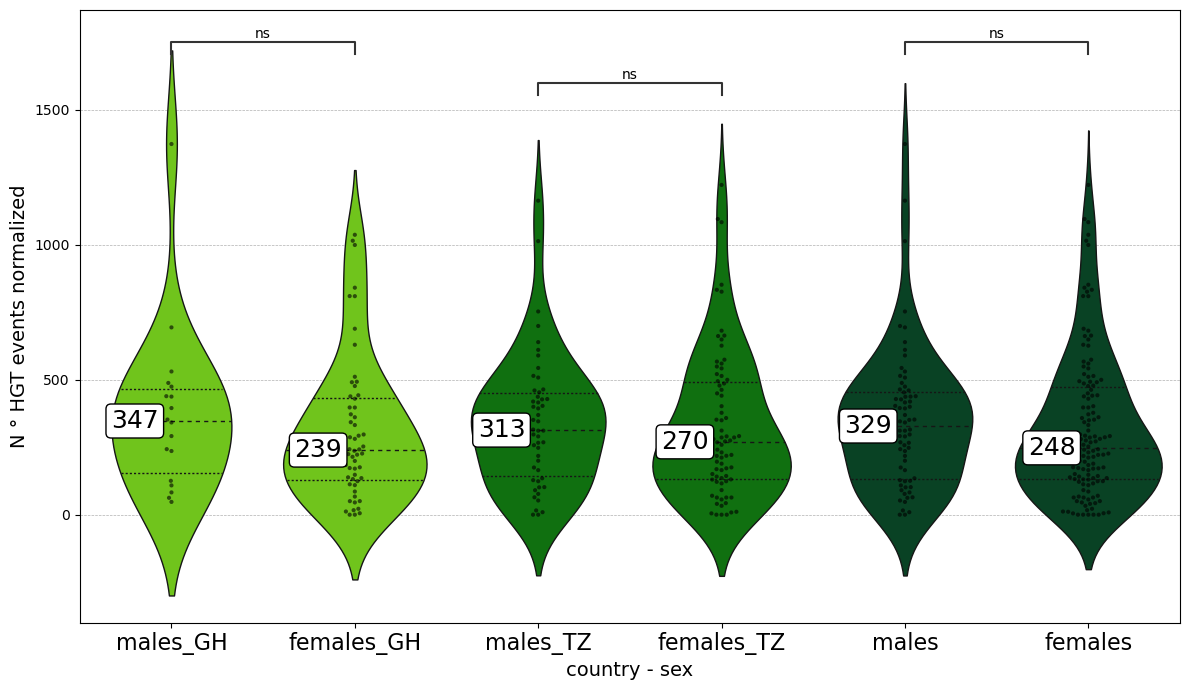

In [26]:
plot_violin_swarm_with_annotations(df_sex_plot, x='dataset', y='mchip_HGT', title='Violin Plot of HGT events distribution divided by country and sex', x_label='country - sex', y_label='N ° HGT events', custom_order=['males_GH', 'females_GH', 'males_TZ', 'females_TZ', 'males', 'females'], palette=mchip_sex,pairs=[("males_GH", "females_GH"), ("males_TZ", "females_TZ"), ("males", "females")])
plot_violin_swarm_with_annotations(df_sex_plot, x='dataset', y='HGT_depth', title='Violin Plot of HGT events normalized by depth distribution divided by country and sex', x_label='country - sex', y_label='N ° HGT events normalized', custom_order=['males_GH', 'females_GH', 'males_TZ', 'females_TZ', 'males', 'females'], palette=mchip_sex,pairs=[("males_GH", "females_GH"), ("males_TZ", "females_TZ"), ("males", "females")])

# Distribution of HGT events per species

### Statistical signifcance

In [27]:
groups = [df_humans,df_dogs,df_cows,df_goats,df_sheeps]
names_list=["humans","dogs","cows","goats","sheeps"]

dunn_species=perform_kruskal_dunn(groups,"mchip_HGT",names_list)
dunn_species_depth=perform_kruskal_dunn(groups,"HGT_depth",names_list)

Kruskal-Wallis test result: H-statistic = 63.06117957850403, p-value = 6.587653996138188e-13
Kruskal-Wallis test is significant, performing Dunn test...
Significant Dunn test results (Bonferroni corrected):
              1   2             3             4         5
1           NaN NaN  3.204684e-09           NaN       NaN
2           NaN NaN           NaN           NaN       NaN
3  3.204684e-09 NaN           NaN  4.554444e-12  0.000114
4           NaN NaN  4.554444e-12           NaN       NaN
5           NaN NaN  1.139642e-04           NaN       NaN
humans cows 3.2046842189357704e-09
cows goats 4.554444412894325e-12
cows sheeps 0.00011396424045626855
Kruskal-Wallis test result: H-statistic = 94.00789915052452, p-value = 1.8523414397836485e-19
Kruskal-Wallis test is significant, performing Dunn test...
Significant Dunn test results (Bonferroni corrected):
              1   2             3             4             5
1           NaN NaN  1.163303e-15           NaN           NaN
2         

/home/giacomo/anaconda3/envs/analysis/lib/python3.12/site-packages/seaborn/categorical.py:1296: UserWarning: 16.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


[('Cows', 'Humans'), ('Goats', 'Cows'), ('Sheep', 'Cows')]
[1.1633027657866514e-15, 1.9284527851208025e-16, 5.841867190544433e-07]
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Cows v.s. Goats: Custom statistical test, P_val:1.928e-16
Humans v.s. Cows: Custom statistical test, P_val:1.163e-15
Cows v.s. Sheep: Custom statistical test, P_val:5.842e-07


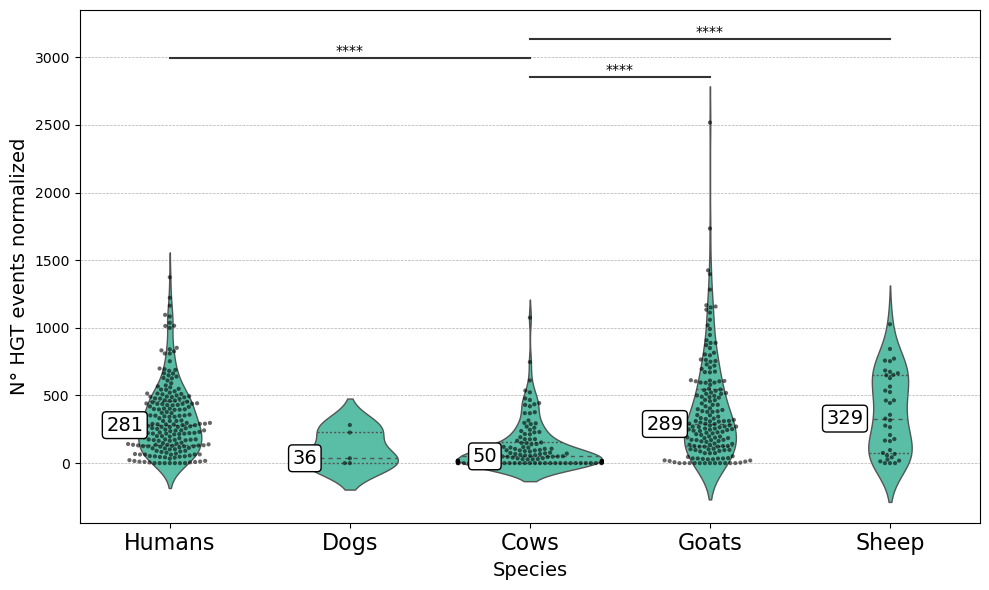

In [28]:
#plot_violin_swarm_with_annotations_animals(df_all_species, x='species', y='mchip_HGT', significant_results=dunn_species, title='Violin Plot of HGT events divided by species', x_label='species', y_label='N ° HGT events normalized', custom_order = ["human", "dog",  "cow","goat", "sheep"], palette=mchip,names=["human","dog","cow","goat","sheep"])
plot_violin_swarm_with_annotations_animals(df_all_species, x='species', y='HGT_depth', significant_results=dunn_species_depth, title='Violin Plot of HGT events normalized by depth distribution divided by species', x_label='Species', y_label='N° HGT events normalized', custom_order = ["Humans", "Dogs",  "Cows","Goats", "Sheep"], palette=mchip,names=["Humans","Dogs","Cows","Goats","Sheep"])

# Distribution of HGT events humans vs animals

### Statistical signifcance

In [29]:
MW_HvsA=mannwhitney(df_animals['mchip_HGT'], df_humans['mchip_HGT'])
MW_HvsA_depth=mannwhitney(df_animals['HGT_depth'], df_humans['HGT_depth'])

print(MW_HvsA)
print(MW_HvsA_depth)

MannwhitneyuResult(statistic=30180.5, pvalue=0.027487583494006675)
MannwhitneyuResult(statistic=27633.5, pvalue=0.0002518081309509056)


### Plot

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Humans v.s. Animals: Mann-Whitney-Wilcoxon test two-sided, P_val=2.518e-04 U_stat=4.044e+04


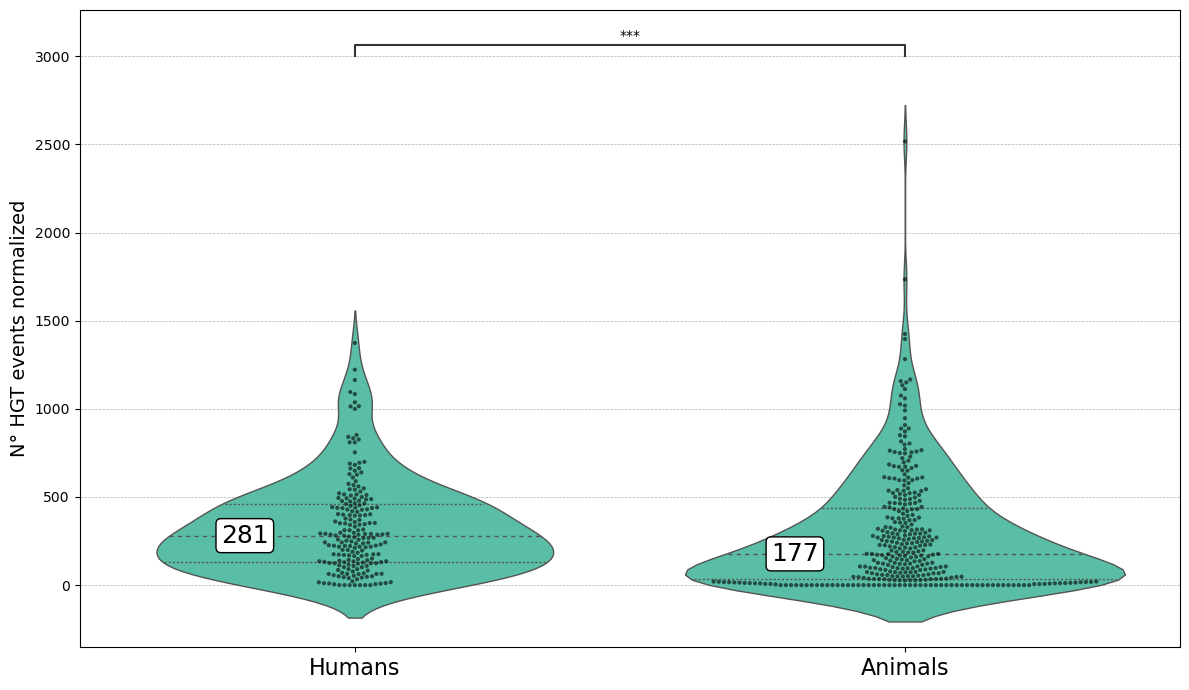

In [30]:
#plot_violin_swarm_with_annotations(df_binomial_species, x='species', y='mchip_HGT', title='Violin Plot of HGT events distribution humans vs animals', x_label='species', y_label='N ° HGT events normalized', custom_order=["human","animal"],  palette=mchip, pairs=[("human", "animal")])
plot_violin_swarm_with_annotations(df_binomial_species, x='species', y='HGT_depth', title='Violin Plot of HGT events normalized by depth humans vs animals', x_label='', y_label='N° HGT events normalized', custom_order=["Humans","Animals"],  palette=mchip, pairs=[("Humans", "Animals")])


# Distribution of HGT events per family role

# Distribution of HGT events by age

### Statistical significance

In [31]:
groups = [df_newborn, df_child, df_schoolage, df_adult, df_senior]
names_list=["newborns","children","schoolage","adults","seniors"]
dunn_age=perform_kruskal_dunn(groups,"mchip_HGT",names_list)
dunn_age_depth=perform_kruskal_dunn(groups,"HGT_depth",names_list)


Kruskal-Wallis test result: H-statistic = 1.2181819334358293, p-value = 0.8750961052161862
Kruskal-Wallis test is not significant, skipping Dunn test.
Kruskal-Wallis test result: H-statistic = 1.3597530664521542, p-value = 0.8511590801869682
Kruskal-Wallis test is not significant, skipping Dunn test.


### Plot

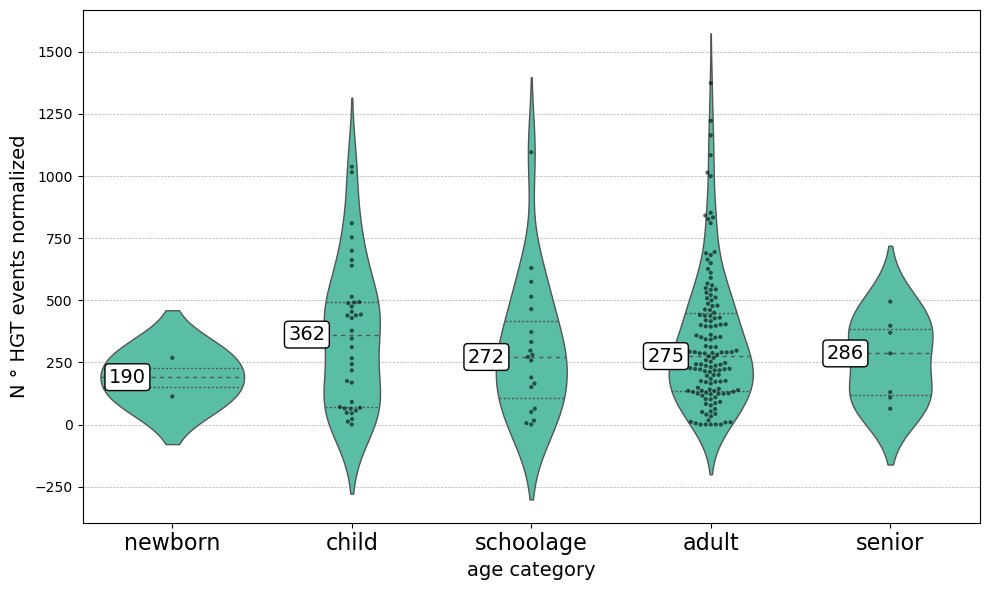

In [32]:
plot_violin_swarm_with_annotations_animals(df_age, x='dataset', y='HGT_depth', title='Violin Plot of HGT events normalized by depth distribution divided by age', x_label='age category', y_label='N ° HGT events normalized', custom_order = ["newborn","child","schoolage","adult","senior"], palette=mchip, names = ["newborn","child","schoolage","adult","senior"])

In [33]:
df_humans_copy2=df_humans.copy()
df_humans_copy2.dropna(subset = ["age_years"], inplace=True)
spearman_correlation_scatter(df_humans_copy2, "HGT_depth", "age_years", "big")

The p-value is not significant (p = 0.38), so the plot will not be created.


# Dsitribution of HGT events by household

### Ghana

KeyboardInterrupt: 

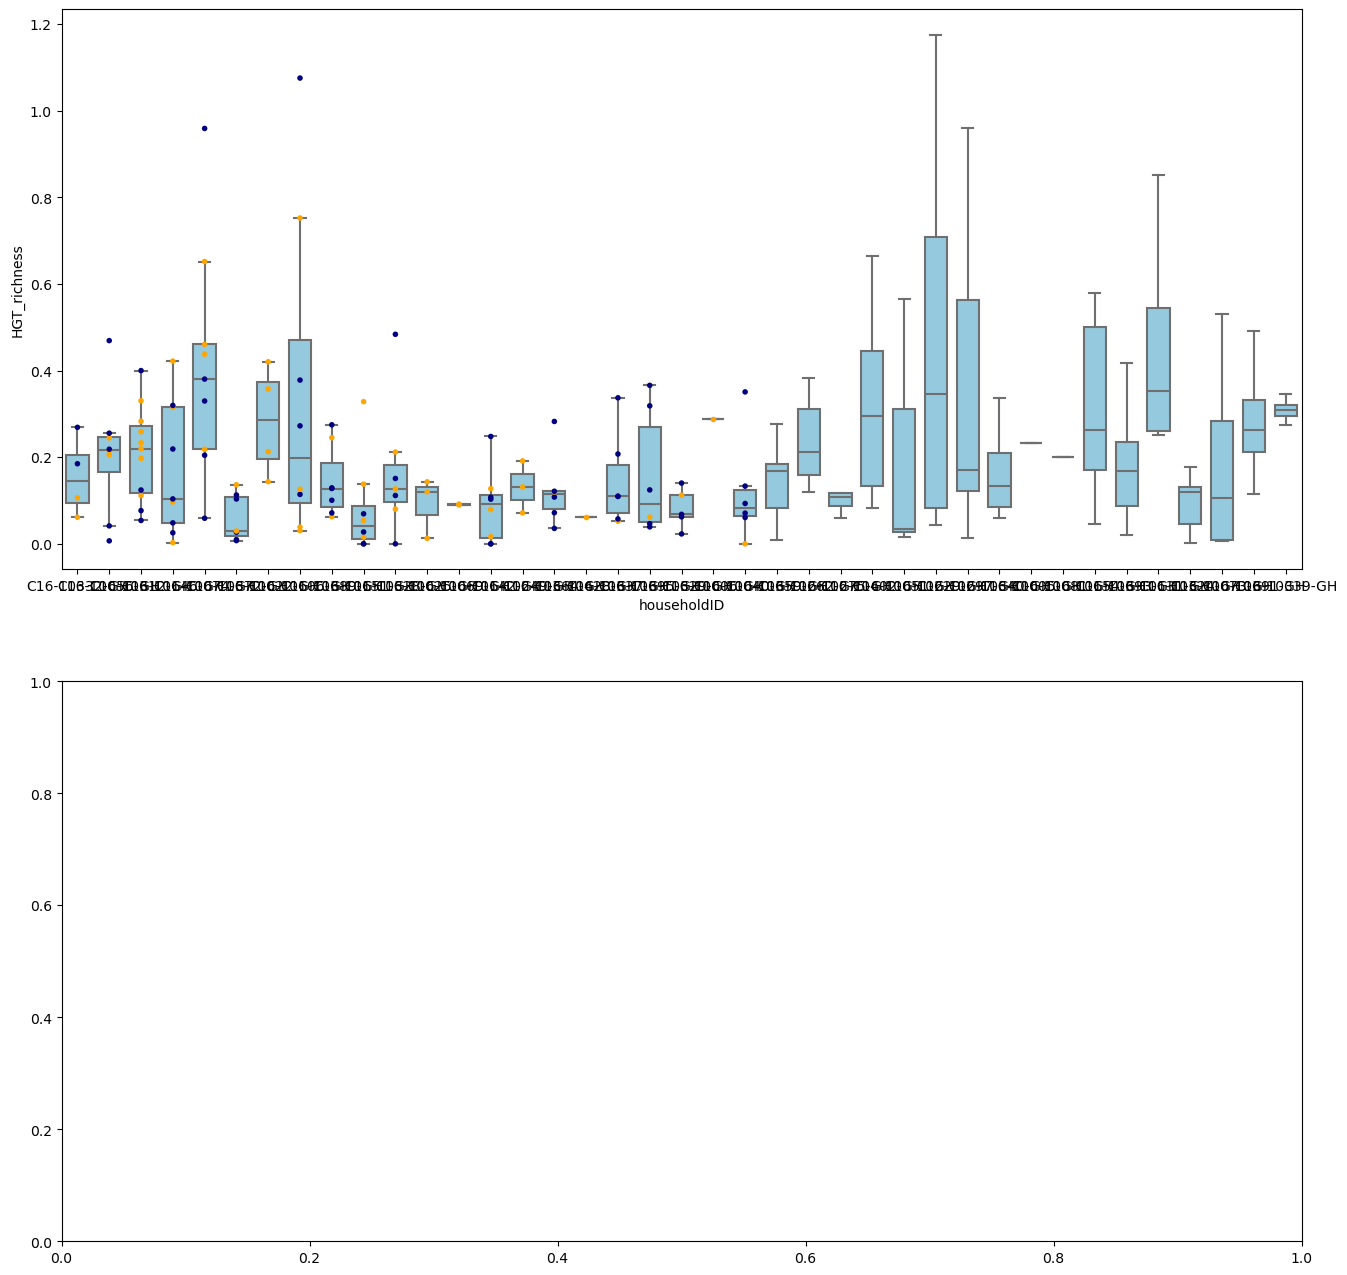

In [34]:
# Set up the figure and axes
fig, axes = plt.subplots(2, 1, figsize=(16, 16))

# Plot the first box plot and swarm plot for HGT_richness
sns.boxplot(x="householdID", y="HGT_richness", data=df_ghana, color='skyblue', width=0.7, ax=axes[0],showfliers=False)
sns.swarmplot(x="householdID", y="HGT_richness", data=df_ghana, hue=df_ghana["species"].apply(lambda x: 'human' if x == 'human' else 'animals'),
              palette={'human': 'orange', 'animals': 'navy'}, size=4, ax=axes[0])

# Set title and labels for the first plot
axes[0].set_title('Distribution of total HGT events by Household in state Ghana (Richness)', fontsize=16)
axes[0].set_xlabel('Household ID', fontsize=14)
axes[0].set_ylabel('N HGT events', fontsize=14)

# Rotate x-axis labels for better readability
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90, fontsize=8, ha='right')

# Improve y-axis ticks formatting
axes[0].ticklabel_format(style='plain', axis='y')

# Plot the second box plot and swarm plot for HGT_depth
sns.boxplot(x="householdID", y="HGT_depth", data=df_ghana, color='skyblue', width=0.7, ax=axes[1],showfliers=False)
sns.swarmplot(x="householdID", y="HGT_depth", data=df_ghana, hue=df_ghana["species"].apply(lambda x: 'human' if x == 'human' else 'animals'),
              palette={'human': 'orange', 'animals': 'navy'}, size=4, ax=axes[1])

# Set title and labels for the second plot
axes[1].set_title('Distribution of total HGT events by Household in state Ghana (Depth)', fontsize=16)
axes[1].set_xlabel('Household ID', fontsize=14)
axes[1].set_ylabel('N HGT events', fontsize=14)

# Rotate x-axis labels for better readability
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90, fontsize=8, ha='right')

# Improve y-axis ticks formatting
axes[1].ticklabel_format(style='plain', axis='y')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

### Tanzania

/home/giacomo/anaconda3/envs/analysis/lib/python3.12/site-packages/seaborn/categorical.py:1296: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/giacomo/anaconda3/envs/analysis/lib/python3.12/site-packages/seaborn/categorical.py:1296: UserWarning: 11.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/giacomo/anaconda3/envs/analysis/lib/python3.12/site-packages/seaborn/categorical.py:1296: UserWarning: 22.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/giacomo/anaconda3/envs/analysis/lib/python3.12/site-packages/seaborn/categorical.py:1296: UserWarning: 12.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/gi

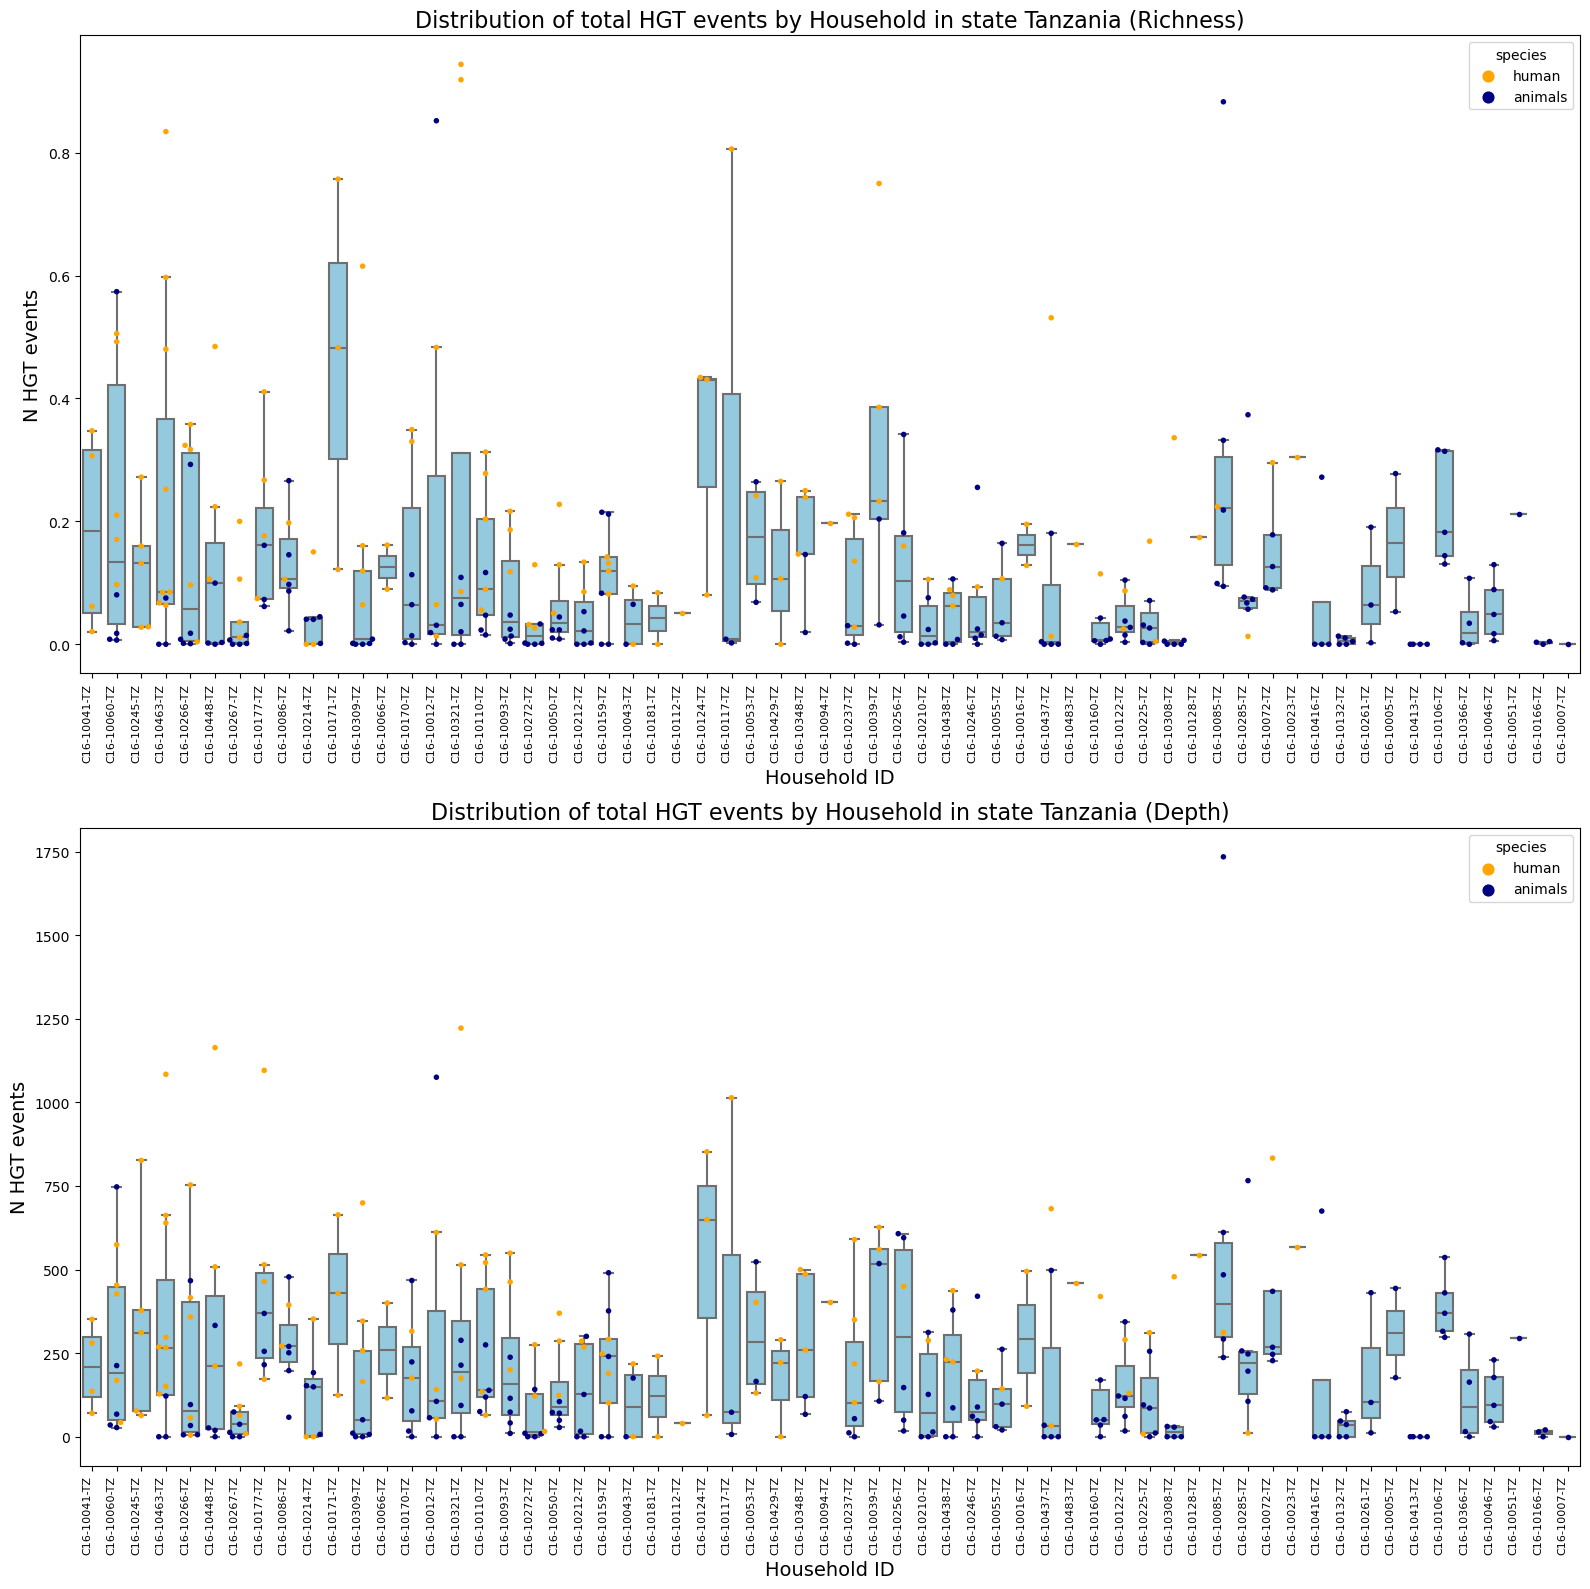

In [ ]:
# Set up the figure and axes
fig, axes = plt.subplots(2, 1, figsize=(16, 16))

# Plot the first box plot and swarm plot for HGT_richness
sns.boxplot(x="householdID", y="HGT_richness", data=df_tanzania, color='skyblue', width=0.7, ax=axes[0],showfliers=False)
sns.swarmplot(x="householdID", y="HGT_richness", data=df_tanzania, hue=df_tanzania["species"].apply(lambda x: 'human' if x == 'human' else 'animals'),
              palette={'human': 'orange', 'animals': 'navy'}, size=4, ax=axes[0])

# Set title and labels for the first plot
axes[0].set_title('Distribution of total HGT events by Household in state Tanzania (Richness)', fontsize=16)
axes[0].set_xlabel('Household ID', fontsize=14)
axes[0].set_ylabel('N HGT events', fontsize=14)

# Rotate x-axis labels for better readability
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90, fontsize=8, ha='right')

# Improve y-axis ticks formatting
axes[0].ticklabel_format(style='plain', axis='y')

# Plot the second box plot and swarm plot for HGT_depth
sns.boxplot(x="householdID", y="HGT_depth", data=df_tanzania, color='skyblue', width=0.7, ax=axes[1],showfliers=False)
sns.swarmplot(x="householdID", y="HGT_depth", data=df_tanzania, hue=df_tanzania["species"].apply(lambda x: 'human' if x == 'human' else 'animals'),
              palette={'human': 'orange', 'animals': 'navy'}, size=4, ax=axes[1])

# Set title and labels for the second plot
axes[1].set_title('Distribution of total HGT events by Household in state Tanzania (Depth)', fontsize=16)
axes[1].set_xlabel('Household ID', fontsize=14)
axes[1].set_ylabel('N HGT events', fontsize=14)

# Rotate x-axis labels for better readability
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90, fontsize=8, ha='right')

# Improve y-axis ticks formatting
axes[1].ticklabel_format(style='plain', axis='y')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

# LCA analysis

In [ ]:
# for dir in os.listdir("/home/giacomo/Thesis-Internship/metachip"):
#     if "CM_" in dir:
#         for file in os.listdir(f"/home/giacomo/Thesis-Internship/metachip/{dir}"):
#             if ".tsv" in file:
#                 df=pd.read_csv(f"/home/giacomo/Thesis-Internship/metachip/{dir}/{file}", sep="\t", index_col=False)
#                 #del df["LCA"]
#                 #del df["Unnamed: 0"]
#                 del df["Unnamed: 0.2"]
#                 df.to_csv(f"/home/giacomo/Thesis-Internship/metachip/{dir}/{file}", sep="\t", index=False)

KeyError: 'Unnamed: 0.2'

In [ ]:
# for dir in os.listdir("/home/giacomo/Thesis-Internship/metachip"):
#     if "CM_" in dir:
#         for file in os.listdir(f"/home/giacomo/Thesis-Internship/metachip/{dir}"):
#             if ".tsv" in file:
#                 with open(f"/home/giacomo/Thesis-Internship/metachip/{dir}/{file}", "r+") as infile:
#                     lcas=[]
#                     next(infile)
#                     for line in infile:
#                         tax1=line.split("\t")[7]
#                         tax2=line.split("\t")[8]
#                         clades1=tax1.split(";")
#                         clades2=tax2.split(";")
#                         lca="r__Root"
#                         if len(clades2)<len(clades1):
#                             for index in range(len(clades2)-1,-1,-1):
#                                 t1=clades1[index]
#                                 t2=clades2[index]
#                                 if t1==t2:
#                                     lca=t1
#                                     break
#                                 else: 
#                                     continue
#                             lcas.append(lca)
#                         else:
#                             for index in range(len(clades1)-1,-1,-1):
#                                 t1=clades1[index]
#                                 t2=clades2[index]
#                                 if t1==t2:
#                                     lca=t1
#                                     break
#                                 else: 
#                                     continue
#                             lcas.append(lca)
                                
#                     df=pd.read_csv(f"/home/giacomo/Thesis-Internship/metachip/{dir}/{file}", sep="\t")
#                     df["LCA"]=lcas
#                     df.to_csv(f"/home/giacomo/Thesis-Internship/metachip/{dir}/{file}", sep="\t", index=False)
#             else:
#                 continue

In [ ]:
df_LCA=pd.DataFrame(columns=["LCA"])
for dir in os.listdir("/home/giacomo/Thesis-Internship/metachip"):
    if "CM_" in dir:
        for file in os.listdir(f"/home/giacomo/Thesis-Internship/metachip/{dir}"):
            if ".tsv" in file:
                with open(f"/home/giacomo/Thesis-Internship/metachip/{dir}/{file}", "r+") as infile:
                    df=pd.read_csv(f"/home/giacomo/Thesis-Internship/metachip/{dir}/{file}", sep="\t")
                    df=df["LCA"]
                    df_LCA=pd.concat([df_LCA,df])
del df_LCA["LCA"]
df_LCA=df_LCA.reset_index()
del df_LCA["index"]
df_LCA=df_LCA.rename(columns={"0":"LCA"})
df_LCA["LCA"]=df_LCA
df_LCA.drop(columns=df_LCA.columns[0], axis=1, inplace=True)
df_LCA.to_csv("/home/giacomo/Thesis-Internship/metachip/df_LCA.tsv", sep="\t", index=False)
df_LCA

,0
0,k__Bacteria
1,p__Firmicutes
2,p__Firmicutes
3,p__Bacteroidota
4,p__Firmicutes
...,...
39005,p__Firmicutes
39006,p__Firmicutes
39007,p__Firmicutes
39008,p__Firmicutes


In [ ]:
df_level=df_LCA.value_counts().rename_axis('LCA').reset_index(name='count')
df_level.head(10)

,LCA,count
0,p__Firmicutes,14058
1,p__Bacteroidota,13442
2,k__Bacteria,4521
3,o__Eubacteriales,2194
4,f__Prevotellaceae,2156
5,o__Bacteroidales,1031
6,g__Prevotella,263
7,f__Lachnospiraceae,243
8,f__Bacteroidaceae,233
9,f__Oscillospiraceae,142


In [ ]:
# Iterate through the rows and check for the specific code
tax=["Root","Kingdom","Phylum","Class","Order","Family","Genus","Species"]
k=0
p=0
c=0
o=0
f=0
g=0
s=0
r=0
l=[]
for index, row in df_level.iterrows():
    if "k__" in row['LCA']:
        k+=row["count"]
    elif "p__" in row['LCA']:
        p+=row["count"]
    elif "c__" in row['LCA']:
        c+=row["count"]
    elif "o__" in row['LCA']:
        o+=row["count"]
    elif "f__" in row['LCA']:
        f+=row["count"]
    elif "g__" in row['LCA']:
        g+=row["count"]
    elif "s__" in row['LCA']:
        s+=row["count"]
    elif "r__" in row['LCA']:
        r+=row["count"]
l.append(r)
l.append(k)
l.append(p)
l.append(c)
l.append(o)
l.append(f)
l.append(g)
l.append(s)

df_clades=pd.DataFrame(columns=["level","count"])
df_clades["level"]=tax
df_clades["count"]=l
df_clades.reset_index()
df_clades

,level,count
0,Root,88
1,Kingdom,4521
2,Phylum,27661
3,Class,127
4,Order,3243
5,Family,3078
6,Genus,292
7,Species,0


/tmp/ipykernel_15002/1177064877.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(df[level_col], rotation=45, ha='right')


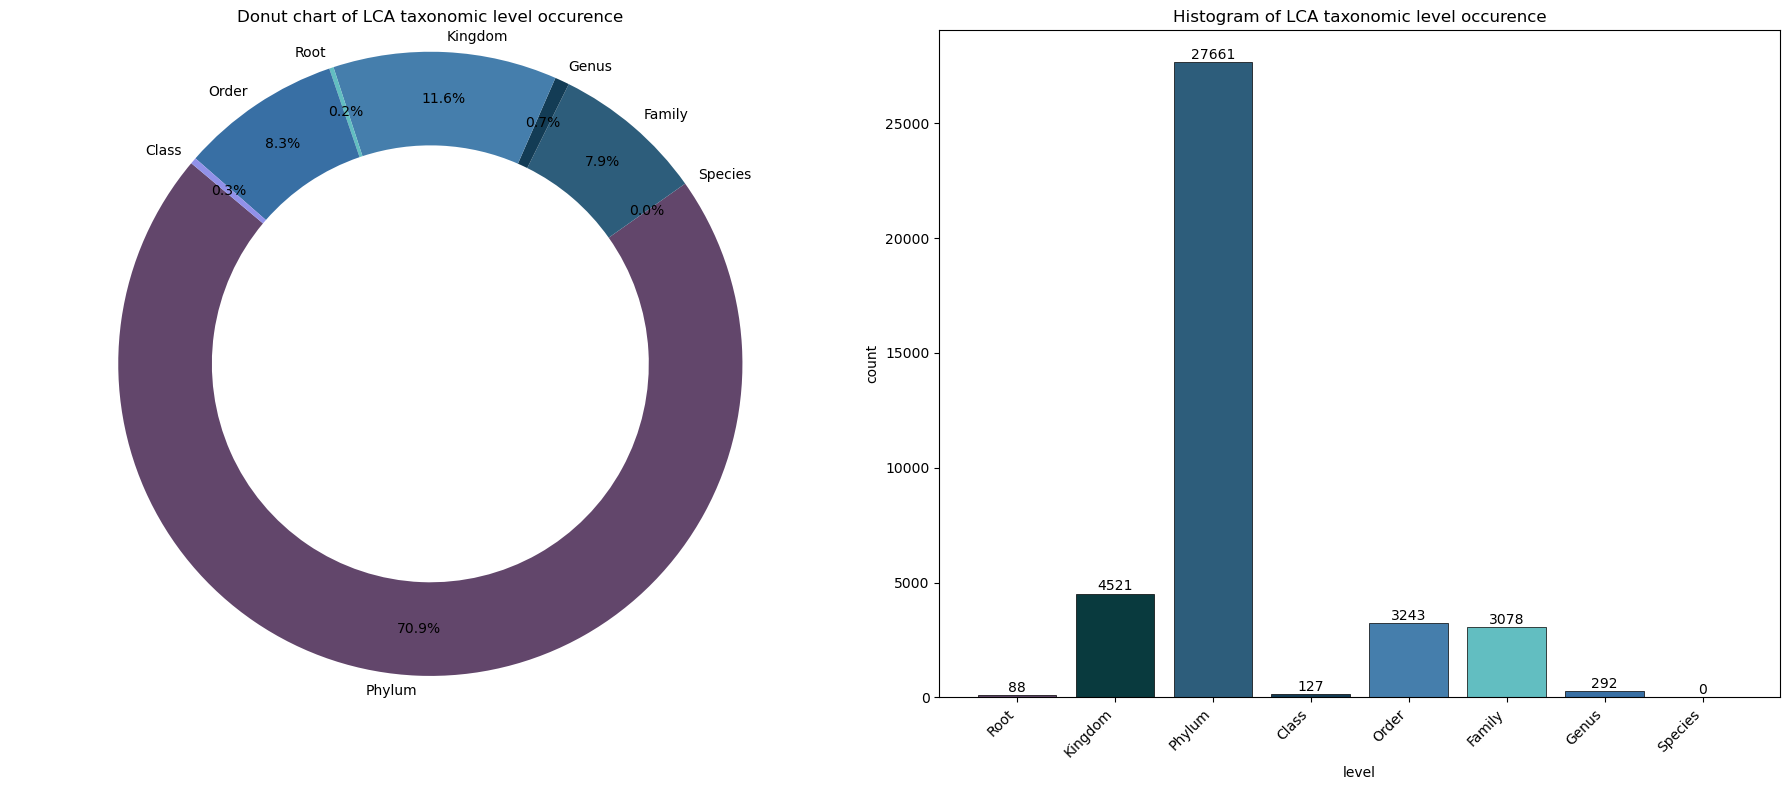

In [ ]:
custom_order = ['Phylum', 'Species', 'Family', 'Genus', 'Kingdom', 'Root', 'Order', 'Class']
plot_donut_and_histogram_with_custom_order(df_clades, custom_order=custom_order,donut_explode=0, colors=lca_colors, title_donut="Donut chart of LCA taxonomic level occurence", title_hist="Histogram of LCA taxonomic level occurence")